## Clustering using K-Modes

In [6]:
import numpy as np 
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Loading, Cleaning, & Merging the Datasets

In [2]:
offices = pd.read_csv('offices.csv')
people = pd.read_csv('people.csv')
acquisitions = pd.read_csv('acquisitions.csv')
degrees = pd.read_csv('degrees.csv')
funding_rounds = pd.read_csv('funding_rounds.csv')
funds = pd.read_csv('funds.csv')
investments = pd.read_csv('investments.csv')
ipos = pd.read_csv('ipos.csv')
milestones = pd.read_csv('milestones.csv')
objects = pd.read_csv('objects.csv')

/Users/nukagvilia/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
objects = pd.read_csv('objects.csv')

In [123]:
objects.columns

Index(['id', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at'],
      dtype='object')

In [4]:
objects.rename(columns={'id':'funded_object_id'}, inplace=True)

In [5]:
objects.drop(["created_at","updated_at", "logo_url", "logo_width","overview", "entity_id","parent_id",\
              "normalized_name", "logo_height","short_description", "created_at", "updated_at", "twitter_username",\
              "relationships", "domain", "homepage_url", "overview", "tag_list","city", "region", "state_code"],\
             axis="columns", inplace=True)

In [6]:
df = investments.merge(objects, on='funded_object_id')

In [124]:
df

,id,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at,entity_type,name,permalink,category_code,...,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,created_by
0,1,1,c:4,f:1,2007-07-04 04:52:57,2008-02-27 23:14:29,Company,Digg,/company/digg,news,...,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
1,2,1,c:4,f:2,2007-07-04 04:52:57,2008-02-27 23:14:29,Company,Digg,/company/digg,news,...,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
2,144,85,c:4,f:1,2007-07-04 04:56:09,2008-02-27 23:14:29,Company,Digg,/company/digg,news,...,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
3,145,85,c:4,f:2,2007-07-04 04:56:09,2008-02-27 23:14:29,Company,Digg,/company/digg,news,...,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
4,146,85,c:4,f:4850,2007-07-04 04:56:09,2008-02-27 23:14:29,Company,Digg,/company/digg,news,...,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80565,80891,57805,c:285592,p:189455,2013-12-12 04:58:50,2013-12-12 04:58:50,Company,Chippmunk,/company/chippmunk,ecommerce,...,0,0,2013-12-11,2013-12-11,1,750000.0,2013-09-19,2013-09-19,1,chippmunk
80566,80899,57912,c:60389,p:268570,2013-12-12 12:32:53,2013-12-12 13:02:54,Company,ROCKETHOME,/company/rockethome,cleantech,...,0,0,2013-07-10,2013-07-10,1,0.0,2013-04-01,2013-07-10,2,NaN
80567,80900,57929,c:286183,p:365,2013-12-12 13:07:40,2013-12-12 13:07:40,Company,Wedding Spot,/company/wedding-spot,web,...,0,0,2013-12-12,2013-12-12,1,225000.0,NaN,NaN,0,ramesh2013
80568,80901,57929,c:286183,p:176466,2013-12-12 13:07:40,2013-12-12 13:07:40,Company,Wedding Spot,/company/wedding-spot,web,...,0,0,2013-12-12,2013-12-12,1,225000.0,NaN,NaN,0,ramesh2013


In [47]:
objects.columns

Index(['funded_object_id', 'entity_type', 'name', 'permalink', 'category_code',
       'status', 'founded_at', 'closed_at', 'description', 'country_code',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'created_by'],
      dtype='object')

In [88]:
objects

,funded_object_id,entity_type,name,permalink,category_code,status,founded_at,closed_at,description,country_code,...,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,created_by
0,c:1,Company,Wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,Technology Platform Company,USA,...,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,initial-importer
1,c:10,Company,Flektor,/company/flektor,games_video,acquired,NaN,NaN,NaN,USA,...,0,0,NaN,NaN,0,0.0,NaN,NaN,0,initial-importer
2,c:100,Company,There,/company/there,games_video,acquired,NaN,NaN,NaN,USA,...,0,0,NaN,NaN,0,0.0,2003-02-01,2011-09-23,4,initial-importer
3,c:10000,Company,MYWEBBO,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,NaN,NaN,...,0,0,NaN,NaN,0,0.0,NaN,NaN,0,NaN
4,c:10001,Company,THE Movie Streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,NaN,NaN,...,0,0,NaN,NaN,0,0.0,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462646,r:9995,Product,"SiteLink, listing feed for Brokerages",/product/sitelink-listing-feed-for-brokerages,NaN,operating,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,0,0.0,NaN,NaN,0,NaN
462647,r:9996,Product,"EDCLink, listing feed for Economic Development...",/product/edclink-listing-feed-for-economic-dev...,NaN,operating,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,0,0.0,NaN,NaN,0,NaN
462648,r:9997,Product,"Cmail, broadcast email marketing",/product/cmail-broadcast-email-marketing,NaN,operating,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,0,0.0,NaN,NaN,0,NaN
462649,r:9998,Product,"CatylistCRM, contact database",/product/catylistcrm-contact-database,NaN,operating,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,0,0.0,NaN,NaN,0,NaN


In [7]:
df = df.drop(['created_at', 'updated_at', 'created_by'], axis = 1)

In [8]:
df.drop(["closed_at", "first_investment_at",\
         "invested_companies", "investment_rounds"], axis="columns", inplace= True)

In [9]:
funding_rounds.drop(['id', 'funding_round_id', 'funding_round_code', 'raised_amount', 'raised_currency_code', 'pre_money_valuation_usd', \
        'pre_money_valuation', 'pre_money_currency_code', 'post_money_valuation_usd', 'post_money_currency_code', \
        'participants', 'is_first_round', 'is_last_round', \
        'source_url', 'source_description', 'created_by', 'updated_at', 'created_at'], axis='columns', inplace=True)

In [10]:
funding_rounds.drop(['post_money_valuation'], axis='columns', inplace=True)

In [11]:
funding_rounds.rename(columns={'object_id':'funded_object_id'}, inplace=True)

In [12]:
df = df.merge(funding_rounds, on='funded_object_id')

In [134]:
df

,id,funding_round_id,funded_object_id,investor_object_id,entity_type,name,permalink,category_code,status,founded_at,...,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,funded_at,funding_round_type,raised_amount_usd
0,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,...,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,2006-12-01,series-b,8500000.0
1,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,...,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,2005-10-01,series-a,2800000.0
2,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,...,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,2008-09-24,series-c+,28700000.0
3,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,...,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,2011-07-12,series-c+,5000000.0
4,2,1,c:4,f:2,Company,Digg,/company/digg,news,acquired,2004-10-11,...,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,2006-12-01,series-b,8500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223893,80891,57805,c:285592,p:189455,Company,Chippmunk,/company/chippmunk,ecommerce,operating,2013-09-19,...,2013-12-11,2013-12-11,1,750000.0,2013-09-19,2013-09-19,1,2013-12-11,angel,750000.0
223894,80899,57912,c:60389,p:268570,Company,ROCKETHOME,/company/rockethome,cleantech,operating,2010-06-01,...,2013-07-10,2013-07-10,1,0.0,2013-04-01,2013-07-10,2,2013-07-10,series-c+,0.0
223895,80900,57929,c:286183,p:365,Company,Wedding Spot,/company/wedding-spot,web,operating,2013-05-01,...,2013-12-12,2013-12-12,1,225000.0,NaN,NaN,0,2013-12-12,angel,225000.0
223896,80901,57929,c:286183,p:176466,Company,Wedding Spot,/company/wedding-spot,web,operating,2013-05-01,...,2013-12-12,2013-12-12,1,225000.0,NaN,NaN,0,2013-12-12,angel,225000.0


In [25]:
df.columns

Index(['id', 'funding_round_id', 'funded_object_id', 'investor_object_id',
       'entity_type', 'name', 'permalink', 'category_code', 'status',
       'founded_at', 'description', 'country_code', 'last_investment_at',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'funded_at', 'funding_round_type', 'raised_amount_usd'],
      dtype='object')

In [13]:
df.drop(['first_milestone_at', 'last_milestone_at', 'last_investment_at'], axis='columns', inplace=True)

In [14]:
df.drop(['permalink'], axis = 1, inplace = True)

In [15]:
funds.drop(['source_url', 'source_description', 'created_at', 'updated_at'], axis = 1, inplace = True)

In [16]:
funds.rename(columns={'object_id':'funded_object_id'}, inplace=True)

In [55]:
funds

,id,fund_id,funded_object_id,name,funded_at,raised_amount,raised_currency_code
0,1,1,f:371,Second Fund,2008-12-16,300000000.0,USD
1,4,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,200750000.0,USD
2,5,5,f:951,Tenth fund,2008-08-11,650000000.0,USD
3,6,6,f:192,New funds acquire,NaN,625000000.0,USD
4,7,7,f:519,Third fund,2008-05-20,200000000.0,USD
...,...,...,...,...,...,...,...
1559,1697,1697,f:101,Fund V,2013-12-11,150000000.0,USD
1560,1698,1698,f:7331,JANVEST Technologies LP I,2013-03-19,5.0,USD
1561,1699,1699,f:7791,Fund II,2013-12-11,5000000.0,USD
1562,1700,1700,f:15091,Fund I,2013-12-11,1100000.0,USD


In [37]:
#df = df.merge(funds, on='funded_object_id')

In [56]:
df.columns

Index(['id', 'funding_round_id', 'funded_object_id', 'investor_object_id',
       'entity_type', 'name', 'category_code', 'status', 'founded_at',
       'description', 'country_code', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'milestones', 'funded_at',
       'funding_round_type', 'raised_amount_usd'],
      dtype='object')

In [57]:
df

,id,funding_round_id,funded_object_id,investor_object_id,entity_type,name,category_code,status,founded_at,description,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,milestones,funded_at,funding_round_type,raised_amount_usd
0,1,1,c:4,f:1,Company,Digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2006-12-01,series-b,8500000.0
1,1,1,c:4,f:1,Company,Digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2005-10-01,series-a,2800000.0
2,1,1,c:4,f:1,Company,Digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2008-09-24,series-c+,28700000.0
3,1,1,c:4,f:1,Company,Digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2011-07-12,series-c+,5000000.0
4,2,1,c:4,f:2,Company,Digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2006-12-01,series-b,8500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223893,80891,57805,c:285592,p:189455,Company,Chippmunk,ecommerce,operating,2013-09-19,Savings Search Engine,USA,2013-12-11,2013-12-11,1,750000.0,1,2013-12-11,angel,750000.0
223894,80899,57912,c:60389,p:268570,Company,ROCKETHOME,cleantech,operating,2010-06-01,Internet and Technology Company,DEU,2013-07-10,2013-07-10,1,0.0,2,2013-07-10,series-c+,0.0
223895,80900,57929,c:286183,p:365,Company,Wedding Spot,web,operating,2013-05-01,NaN,USA,2013-12-12,2013-12-12,1,225000.0,0,2013-12-12,angel,225000.0
223896,80901,57929,c:286183,p:176466,Company,Wedding Spot,web,operating,2013-05-01,NaN,USA,2013-12-12,2013-12-12,1,225000.0,0,2013-12-12,angel,225000.0


In [17]:
offices.drop(['id', 'office_id', 'description', 'address1', 'address2', 'created_at', 'updated_at', 'zip_code'], \
             axis = 1, inplace = True)

In [18]:
offices.rename(columns={'object_id':'funded_object_id'}, inplace=True)

In [19]:
df = df.merge(offices, on='funded_object_id')

In [21]:
df.columns

Index(['id', 'funding_round_id', 'funded_object_id', 'investor_object_id',
       'entity_type', 'name', 'category_code', 'status', 'founded_at',
       'description', 'country_code_x', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'milestones', 'funded_at',
       'funding_round_type', 'raised_amount_usd', 'region', 'city',
       'state_code', 'country_code_y', 'latitude', 'longitude'],
      dtype='object')

In [63]:
df['state_code'].isnull().sum()

79275

### Creating distinct regions within the US

In [24]:
midwest = ['IL', 'MI', 'OH', 'IN', 'WI', 'MN', 'IA', 'SD', 'ND']
west = {'CA', 'CO', 'AZ', 'OR', 'WA', 'NV', 'UT', 'WY', 'ID', 'HI', 'NM', 'MT'}
south = {'TX', 'AL', 'GA', 'FL', 'KY', 'MO', 'NE', 'TN', 'LA', 'SC', 'OK', 'MS', 'KS', 'WV', 'AR'}
east = {'NY', 'VA', 'MA', 'NC', 'PA', 'CT', 'DC', 'MD', 'RI', 'ME', 'NJ', 'DE', 'NH', 'VT'}
# conditions = [
#     df['state_code'] in midwest, df['state_code'] in west, df['state_code'] in south, df['state_code'] in east]

In [25]:
conditions_us = [
    df['state_code'].isin(midwest), df['state_code'].isin(west), df['state_code'].isin(south), \
    df['state_code'].isin(east)
]
choices = ['Midwest', 'West', 'South', 'East']
df['US_regions'] = np.select(conditions_us, choices, default='Other')

In [81]:
df.reset_index(level=0, inplace=True)

In [82]:
df

,index,id,funding_round_id,funded_object_id,investor_object_id,entity_type,name,category_code,status,founded_at,...,funding_round_type,raised_amount_usd,region,city,state_code,country_code_y,latitude,longitude,region2,index1
0,0,1,1,c:4,f:1,Company,Digg,news,acquired,2004-10-11,...,series-b,8500000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,west,0
1,1,1,1,c:4,f:1,Company,Digg,news,acquired,2004-10-11,...,series-a,2800000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,west,1
2,2,1,1,c:4,f:1,Company,Digg,news,acquired,2004-10-11,...,series-c+,28700000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,west,2
3,3,1,1,c:4,f:1,Company,Digg,news,acquired,2004-10-11,...,series-c+,5000000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,west,3
4,4,2,1,c:4,f:2,Company,Digg,news,acquired,2004-10-11,...,series-b,8500000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,west,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292901,292901,80891,57805,c:285592,p:189455,Company,Chippmunk,ecommerce,operating,2013-09-19,...,angel,750000.0,Los Angeles,Los Angeles,CA,USA,0.000000,0.000000,west,292901
292902,292902,80899,57912,c:60389,p:268570,Company,ROCKETHOME,cleantech,operating,2010-06-01,...,series-c+,0.0,Cologne,Cologne,NaN,DEU,0.000000,0.000000,west,292902
292903,292903,80900,57929,c:286183,p:365,Company,Wedding Spot,web,operating,2013-05-01,...,angel,225000.0,California - Other,NaN,CA,USA,0.000000,0.000000,west,292903
292904,292904,80901,57929,c:286183,p:176466,Company,Wedding Spot,web,operating,2013-05-01,...,angel,225000.0,California - Other,NaN,CA,USA,0.000000,0.000000,west,292904


In [83]:
df.columns = df.columns.str.replace(' ', '')

### Creating macroregions worldwide

In [21]:
df.rename(columns={'country_code_x': 'country_code'}, inplace = True)

In [22]:
north_america = ['USA', 'CAN']
europe = ['GBR', 'DEU', 'FRA', 'ESP', 'SWE', 'BEL', 'CHE', 'IRL', 'NLD', 'LUX', 'ITA', 'FIN', 'DNK', 'AUT', 'NOR', 'CYP' \
         'GRC', 'EST', 'CZE', 'PRT', 'POL', 'LTU', 'BGR', 'HUN', 'ROM', 'UKR', 'SVK', 'ISL', 'LVA']
asia = ['ISR', 'IND', 'CHN', 'JPN', 'SGP', 'RUS', 'MYS', 'KOR', 'TUR', 'JOR', 'IDN', 'HKG', 'ARE', 'BGD', 'PHL', 'TWN',\
       'THA', 'VNM']
latin_america = ['BRA', 'ARG', 'CHL', 'MEX', 'COL', 'URY']
oceania = ['AUS', 'NZL']
africa = ['ZAF', 'NGA', 'GHA', 'KEN', 'EGY']

In [23]:
conditions_countries = [
    df['country_code'].isin(north_america), df['country_code'].isin(europe), df['country_code'].isin(asia), \
    df['country_code'].isin(latin_america), df['country_code'].isin(oceania), df['country_code'].isin(africa)
]
choices = ['North America', 'Europe', 'Asia', 'Latin America', 'Oceania', 'Africa']
df['region2'] = np.select(conditions_countries, choices, default='Other')

In [121]:
df['region2'].value_counts()

North America    237311
Europe            38903
Asia              13055
Latin America      1567
Oceania            1273
Other               632
Africa              165
Name: region2, dtype: int64

In [26]:
df.to_csv('df_clustering')

In [8]:
df = pd.read_csv('df_clustering')

In [137]:
df.columns

Index(['index', 'id', 'funding_round_id', 'funded_object_id',
       'investor_object_id', 'entity_type', 'name', 'category_code', 'status',
       'founded_at', 'description', 'country_code', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd', 'milestones',
       'funded_at', 'funding_round_type', 'raised_amount_usd', 'region',
       'city', 'state_code', 'country_code_y', 'latitude', 'longitude',
       'region2', 'index1'],
      dtype='object')

### K-Modes Clustering

In [27]:
#!pip install kmodes

In [9]:
from kmodes.kmodes import KModes

In [10]:
df_kmodes = df[['region2', 'funding_round_type', 'category_code']]

In [11]:
df_kmodes.dropna(subset = ['category_code'], inplace = True)

<ipython-input-11-9232358108e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmodes.dropna(subset = ['category_code'], inplace = True)


In [12]:
df.dropna(subset = ['category_code'], inplace = True)

### Creating an Elbow Graph to decide how many clusters to use

Elbow Graph for global macro regions data

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23530, cost: 369610.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 18476, cost: 349480.0
Run 2, iteration: 2/100, moves: 4744, cost: 349480.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 27237, cost: 392460.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 38047, cost: 329401.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 27037, cost: 378617.0
Best run was number 4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 40643, cost: 340757.0
Run 1, iteration: 2/100, moves: 42865, cost: 340757.0
Init: initializing centroids
Init: initializing clusters
Starting i

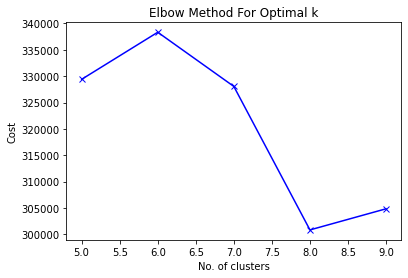

In [32]:
cost = []
K = range(5,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_kmodes)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

We utilized the elbow graph above when deciding how many clusters to run k-modes algorithm with. The graph sharply declines around 7 clusters, and shows that 8 is the optimal number, especially since the elbow inclines again after 8. 

Elbow Graph for US regions data

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 644141.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 644141.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 644141.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 644141.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 644141.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7681, cost: 582955.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 33939, cost: 544725.0
Init: initializing centroids
Init: initializing clusters
Star

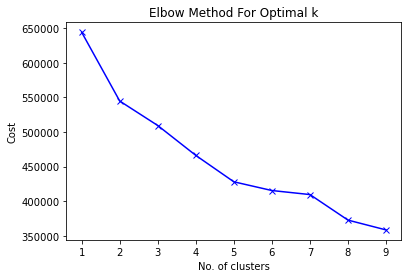

In [40]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_kmodes2)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

The elbow graph generated using the dataframe containing our US regions data agrees with our macro regions elbow graph. 

### Creating Clusters

In [13]:
kmode = KModes(n_clusters=8, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_kmodes)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 61369, cost: 294669.0
Run 1, iteration: 2/100, moves: 4785, cost: 294669.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 85664, cost: 311060.0
Run 2, iteration: 2/100, moves: 51557, cost: 311060.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 99205, cost: 308091.0
Run 3, iteration: 2/100, moves: 3508, cost: 308091.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 118297, cost: 320553.0
Run 4, iteration: 2/100, moves: 32876, cost: 320553.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 72921, cost: 324204.0
Run 5, iteration: 2/100, moves: 589, cost: 324204.0
Best run was number 1


array([1, 6, 7, ..., 4, 4, 4], dtype=uint16)

In [14]:
df.insert(0, "Cluster", clusters, True)

In [37]:
df

,Cluster,id,funding_round_id,funded_object_id,investor_object_id,entity_type,name,category_code,status,founded_at,...,funding_round_type,raised_amount_usd,region,city,state_code,country_code_y,latitude,longitude,region2,US_regions
0,3,1,1,c:4,f:1,Company,Digg,news,acquired,2004-10-11,...,series-b,8500000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,North America,West
1,1,1,1,c:4,f:1,Company,Digg,news,acquired,2004-10-11,...,series-a,2800000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,North America,West
2,2,1,1,c:4,f:1,Company,Digg,news,acquired,2004-10-11,...,series-c+,28700000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,North America,West
3,2,1,1,c:4,f:1,Company,Digg,news,acquired,2004-10-11,...,series-c+,5000000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,North America,West
4,3,2,1,c:4,f:2,Company,Digg,news,acquired,2004-10-11,...,series-b,8500000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,North America,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292901,4,80891,57805,c:285592,p:189455,Company,Chippmunk,ecommerce,operating,2013-09-19,...,angel,750000.0,Los Angeles,Los Angeles,CA,USA,0.000000,0.000000,North America,West
292902,2,80899,57912,c:60389,p:268570,Company,ROCKETHOME,cleantech,operating,2010-06-01,...,series-c+,0.0,Cologne,Cologne,NaN,DEU,0.000000,0.000000,Europe,Other
292903,1,80900,57929,c:286183,p:365,Company,Wedding Spot,web,operating,2013-05-01,...,angel,225000.0,California - Other,NaN,CA,USA,0.000000,0.000000,North America,West
292904,1,80901,57929,c:286183,p:176466,Company,Wedding Spot,web,operating,2013-05-01,...,angel,225000.0,California - Other,NaN,CA,USA,0.000000,0.000000,North America,West


In [15]:
df_kmodes2 = df[['US_regions', 'funding_round_type', 'category_code']]

In [16]:
clusters_us = kmode.fit_predict(df_kmodes2)
clusters_us

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 404454.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 22570, cost: 403675.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 68556, cost: 405716.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 80213, cost: 375979.0
Run 4, iteration: 2/100, moves: 10485, cost: 375979.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 44197, cost: 377636.0
Best run was number 4


array([5, 2, 7, ..., 5, 5, 5], dtype=uint16)

In [17]:
df.insert(0, "Cluster_US", clusters_us, True)

In [53]:
df

,Cluster,Cluster_US,id,funding_round_id,funded_object_id,investor_object_id,entity_type,name,category_code,status,...,funding_round_type,raised_amount_usd,region,city,state_code,country_code_y,latitude,longitude,region2,US_regions
0,3,1,1,1,c:4,f:1,Company,Digg,news,acquired,...,series-b,8500000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,North America,West
1,1,5,1,1,c:4,f:1,Company,Digg,news,acquired,...,series-a,2800000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,North America,West
2,2,2,1,1,c:4,f:1,Company,Digg,news,acquired,...,series-c+,28700000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,North America,West
3,2,2,1,1,c:4,f:1,Company,Digg,news,acquired,...,series-c+,5000000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,North America,West
4,3,1,2,1,c:4,f:2,Company,Digg,news,acquired,...,series-b,8500000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,North America,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292901,4,7,80891,57805,c:285592,p:189455,Company,Chippmunk,ecommerce,operating,...,angel,750000.0,Los Angeles,Los Angeles,CA,USA,0.000000,0.000000,North America,West
292902,2,0,80899,57912,c:60389,p:268570,Company,ROCKETHOME,cleantech,operating,...,series-c+,0.0,Cologne,Cologne,NaN,DEU,0.000000,0.000000,Europe,Other
292903,1,7,80900,57929,c:286183,p:365,Company,Wedding Spot,web,operating,...,angel,225000.0,California - Other,NaN,CA,USA,0.000000,0.000000,North America,West
292904,1,7,80901,57929,c:286183,p:176466,Company,Wedding Spot,web,operating,...,angel,225000.0,California - Other,NaN,CA,USA,0.000000,0.000000,North America,West


In [18]:
df2 = df[df.status != 'operating']

Group by to show most prevalent features in each cluster

In [19]:
df2.groupby('Cluster')['funding_round_type', 'category_code', 'region2'].agg(pd.Series.mode)

<ipython-input-19-fa7c92541a0c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby('Cluster')['funding_round_type', 'category_code', 'region2'].agg(pd.Series.mode)


,funding_round_type,category_code,region2
Cluster,,,
0,venture,biotech,North America
1,series-b,software,North America
2,venture,software,Europe
3,series-b,biotech,Europe
4,angel,web,North America
5,other,biotech,North America
6,series-a,advertising,North America
7,series-c+,enterprise,North America


While there is a variation between funding round types and category codes shown between clusters, we can see that the region is predominantly North America, which suggests that most startups, at least within this dataset, are based in and operated there. From this we can also draw some insight as to how market segments can vary across regions. For example, software appears twice as the most common category in that cluster (clusters 1 & 2). However, they have different regions and funding type that suggest that the software industry in North America seems to be more mature than Europes, since the most frequent funding round type is Series-b compared to Venture (which varies more and doesn't have defined series). We can say that perhaps the opposite is true when comparing startups in the biotech industries between Europe and North America (clusters 3 & 5). However, since "other" doesn't provide much information, we can't say for sure this is the case. 

We can also see that from cluster 4, North America seems to appreciate riskier ventures particularly in the web category since "angel" is the most common type of funding. From cluster 7, we can see that startups in the enterprise category are usually more mature, due to the series-c+ dominant funding. 

In [74]:
df

,Cluster,Cluster_US,id,funding_round_id,funded_object_id,investor_object_id,entity_type,name,category_code,status,...,funding_round_type,raised_amount_usd,region,city,state_code,country_code_y,latitude,longitude,region2,US_regions
0,3,1,1,1,c:4,f:1,Company,Digg,news,acquired,...,series-b,8500000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,North America,West
1,1,5,1,1,c:4,f:1,Company,Digg,news,acquired,...,series-a,2800000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,North America,West
2,2,2,1,1,c:4,f:1,Company,Digg,news,acquired,...,series-c+,28700000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,North America,West
3,2,2,1,1,c:4,f:1,Company,Digg,news,acquired,...,series-c+,5000000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,North America,West
4,3,1,2,1,c:4,f:2,Company,Digg,news,acquired,...,series-b,8500000.0,SF Bay,San Francisco,CA,USA,37.764726,-122.394523,North America,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292901,4,7,80891,57805,c:285592,p:189455,Company,Chippmunk,ecommerce,operating,...,angel,750000.0,Los Angeles,Los Angeles,CA,USA,0.000000,0.000000,North America,West
292902,2,0,80899,57912,c:60389,p:268570,Company,ROCKETHOME,cleantech,operating,...,series-c+,0.0,Cologne,Cologne,NaN,DEU,0.000000,0.000000,Europe,Other
292903,1,7,80900,57929,c:286183,p:365,Company,Wedding Spot,web,operating,...,angel,225000.0,California - Other,NaN,CA,USA,0.000000,0.000000,North America,West
292904,1,7,80901,57929,c:286183,p:176466,Company,Wedding Spot,web,operating,...,angel,225000.0,California - Other,NaN,CA,USA,0.000000,0.000000,North America,West


In [20]:
df_cluster = pd.DataFrame(df2[['status', 'Cluster']].groupby(['Cluster', 'status']).size().reset_index())

#df_cluster.columns = ['Status', 'Cluster']
df_cluster.columns = ['Cluster', 'status', 'status_count']
df_cluster

,Cluster,status,status_count
0,0,acquired,8880
1,0,closed,1962
2,0,ipo,4934
3,1,acquired,7035
4,1,closed,1198
5,1,ipo,2236
6,2,acquired,4568
7,2,closed,868
8,2,ipo,386
9,3,acquired,653


In [45]:
total_status = df_cluster.groupby('Cluster').agg({'status_count':'sum'})

In [52]:
total_status['times'] = pd.Series([3,3,3,3,3,3,3,3])

In [53]:
total_status

,status_count,times
Cluster,,
0,15776,3
1,10469,3
2,5822,3
3,1009,3
4,8684,3
5,3224,3
6,10245,3
7,12405,3


In [127]:
times = pd.DataFrame([3, 3, 3, 3, 3, 3, 3, 3])

In [56]:
total_status = total_status.loc[total_status.index.repeat(total_status.times)]

In [74]:
total_status = total_status.reset_index()

In [79]:
total_status.rename(columns = {'status_count':'status_count_m'}, inplace = True)

In [97]:
total_status = pd.DataFrame(total_status)

In [98]:
total_status

,Cluster,status_count_m,times
0,0,15776,3
1,0,15776,3
2,0,15776,3
3,1,10469,3
4,1,10469,3
5,1,10469,3
6,2,5822,3
7,2,5822,3
8,2,5822,3
9,3,1009,3


In [99]:
df_cluster['total_status_count'] = total_status.status_count_m

In [101]:
df_cluster['percentage'] = round((df_cluster['status_count']/df_cluster['total_status_count'])*100, 2)

Transformed total count to a count percentage within each cluster to standardize and compare:

In [102]:
df_cluster

,Cluster,status,status_count,total_status_count,percentage
0,0,acquired,8880,15776,56.29
1,0,closed,1962,15776,12.44
2,0,ipo,4934,15776,31.28
3,1,acquired,7035,10469,67.20
4,1,closed,1198,10469,11.44
5,1,ipo,2236,10469,21.36
6,2,acquired,4568,5822,78.46
7,2,closed,868,5822,14.91
8,2,ipo,386,5822,6.63
9,3,acquired,653,1009,64.72


In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

### Cluster membership for worldwide regions

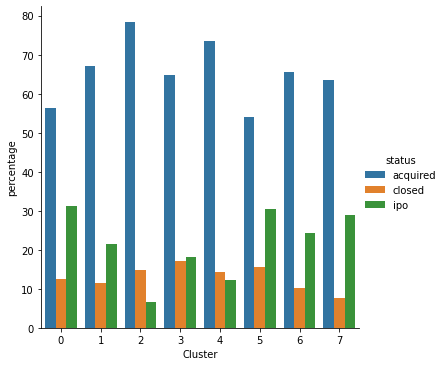

In [114]:
import seaborn as sbn
sbn.catplot(x='Cluster',y='percentage',data=df_cluster,kind='bar',hue='status')
plt.show()

This multi bar chart visualizes cluster membership worldwide plotting the percentage against status for each cluster. We can see some interesting trends from this as well. For example, it seems to be the standard for most startups in clusters 2, 3, and 4 to sell their company and become acquired as opposed to clusters 0 and 7 where there is a more even ratio between startups who decide to go public and startups that get acquired. This could be because of the predominant region or category present in each cluster. 

In [21]:
df_us= df[df.US_regions != 'Other']

In [22]:
df_us = df_us[df_us.status != 'operating']

In [23]:
df_cluster2 = pd.DataFrame(df_us[['status', 'Cluster']].groupby(['Cluster', 'status']).size().reset_index())

#df_cluster.columns = ['Status', 'Cluster']
df_cluster2.columns = ['Cluster', 'status', 'status_count']
df_cluster2

,Cluster,status,status_count
0,0,acquired,7168
1,0,closed,1593
2,0,ipo,4364
3,1,acquired,5946
4,1,closed,1032
5,1,ipo,1618
6,2,acquired,811
7,2,closed,28
8,2,ipo,105
9,3,acquired,106


In [136]:
total_status = df_cluster2.groupby('Cluster').agg({'status_count':'sum'})
total_status['times'] = times
total_status = total_status.loc[total_status.index.repeat(total_status.times)]
total_status = total_status.reset_index()
total_status.rename(columns = {'status_count':'status_count_m'}, inplace = True)
total_status = pd.DataFrame(total_status)
df_cluster2['total_status_count'] = total_status.status_count_m
df_cluster2['percentage'] = round((df_cluster2['status_count']/df_cluster2['total_status_count'])*100, 2)

In [119]:
df_cluster2

,Cluster,status,status_count,total_status_count,percentage
0,0,acquired,7168,13125.0,54.61
1,0,closed,1593,8596.0,18.53
2,0,ipo,4364,944.0,462.29
3,1,acquired,5946,158.0,3763.29
4,1,closed,1032,7564.0,13.64
5,1,ipo,1618,2763.0,58.56
6,2,acquired,811,8485.0,9.56
7,2,closed,28,9537.0,0.29
8,2,ipo,105,NaN,NaN
9,3,acquired,106,NaN,NaN


### Cluster membership for US regions

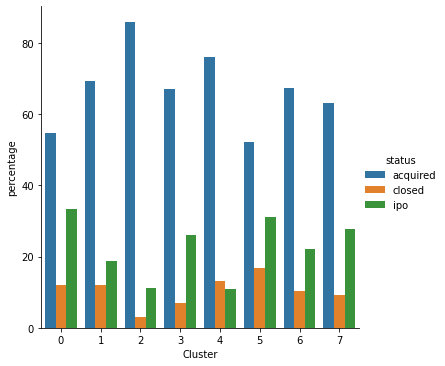

In [137]:
sbn.catplot(x='Cluster',y='percentage',data=df_cluster2,kind='bar', hue='status')
plt.show()

Compared to the worldwide cluster membership map, it seems that again, 2 and 4 prefer to be acquired rather than going public. However, looking at this map compared to the worldwide map, we can see that they both tend to follow the same pattern, suggesting that North America accounts for most of the trends being shown, since it is a large portion of our dataset. 